In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import argparse

from models import *
#from utils import progress_bar

import numpy as np
import matplotlib.pyplot as plt

import copy


In [3]:
state_dict = torch.load('./checkpoint_cifar10/thr_1e-5/last.ckpt', map_location='cpu')

FileNotFoundError: [Errno 2] No such file or directory: './checkpoint_cifar10/thr_1e-5/last.ckpt'

In [ ]:
state_dict['net'].keys()

In [4]:
def investigate(fname, spar_thr, filter=True):
    checkpoint = torch.load(fname, map_location='cpu')
    best_acc = checkpoint['acc']
    net_state_dict = checkpoint['net']
    total_num_params = 0
    non_zero_num_params = 0
    for k in net_state_dict:
        if ('conv' in k and 'weight' in k) or ('linear.weight' in k) or filter == False:
            param = net_state_dict[k]
            total_num_params += param.numel()
            non_zero_num_params += (param > spar_thr).sum()
            #print(total_num_params / non_zero_num_params)
    compress_ratio = total_num_params / non_zero_num_params
    return best_acc, compress_ratio.item()

In [4]:
name = 'cifar10'
spar_thr = 1e-10
filter_flag = True
print(name)

acc_list, cr_list = [], []
for k in "1e-1,8e-2,6e-2,4e-2,2e-2,1e-2,1e-3,1e-4,1e-5,1e-6".split(','):
    _acc, _cr = investigate(f'./checkpoint_{name}/thr_{k}/last.ckpt', spar_thr, filter=filter_flag)
    acc_list.append(_acc)
    cr_list.append(_cr)
print(cr_list)
print(acc_list)
    
plt.plot(cr_list, acc_list)
plt.title(f"dataset {name} zero thr {spar_thr} filter conv and linear={filter_flag}")
plt.xscale('log')
plt.xlabel('Compression Ratio')
plt.ylabel('Accuracy')

cifar10


FileNotFoundError: [Errno 2] No such file or directory: './checkpoint_cifar10/thr_1e-1/last.ckpt'

In [5]:
name = 'cifar10'
spar_thr = 1e-10
filter_flag = False
print(name)

acc_list, cr_list = [], []
for k in "1e-1,8e-2,6e-2,4e-2,2e-2,1e-2,1e-3,1e-4,1e-5,1e-6".split(','):
    _acc, _cr = investigate(f'./checkpoint_{name}/thr_{k}/last.ckpt', spar_thr, filter=filter_flag)
    acc_list.append(_acc)
    cr_list.append(_cr)
print(cr_list)
print(acc_list)
    
plt.plot(cr_list, acc_list)
plt.title(f"dataset {name} zero thr {spar_thr} filter conv and linear={filter_flag}")
plt.xscale('log')
plt.xlabel('Compression Ratio')
plt.ylabel('Accuracy')

cifar10


FileNotFoundError: [Errno 2] No such file or directory: './checkpoint_cifar10/thr_1e-1/last.ckpt'

cifar10
[54688.15625, 22251.66015625, 2026.04736328125, 629.5715942382812, 298.53399658203125, 268.01385498046875, 163.7516326904297, 108.52432250976562, 73.02993774414062, 52.188934326171875]
[10.0, 30.55, 78.77, 91.73, 92.94, 92.61, 92.35, 92.14, 93.0, 92.17]


Text(0, 0.5, 'Accuracy')

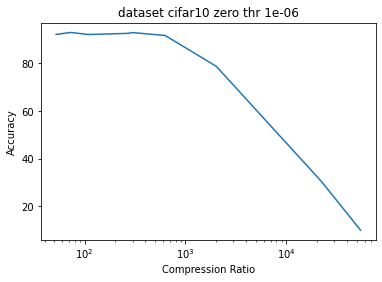

In [31]:
name = 'cifar10'
spar_thr = 1e-6
print(name)

acc_list, cr_list = [], []
for k in "1e-1,8e-2,6e-2,4e-2,2e-2,1e-2,1e-3,1e-4,1e-5,1e-6".split(','):
    _acc, _cr = investigate(f'./checkpoint_{name}/thr_{k}/last.ckpt', spar_thr)
    acc_list.append(_acc)
    cr_list.append(_cr)
print(cr_list)
print(acc_list)
    
plt.plot(cr_list, acc_list)
plt.title(f"dataset {name} zero thr {spar_thr}")
plt.xscale('log')
plt.xlabel('Compression Ratio')
plt.ylabel('Accuracy')

cifar10
[22117.34375, 6568.46142578125, 1931.01806640625, 629.5535888671875, 298.2019348144531, 246.2575225830078, 135.1910858154297, 83.1039047241211, 52.627315521240234, 36.205692291259766]
[10.0, 30.55, 78.77, 91.73, 92.94, 92.61, 92.35, 92.14, 93.0, 92.17]


Text(0, 0.5, 'Accuracy')

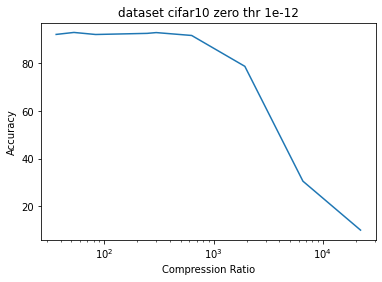

In [32]:
name = 'cifar10'
spar_thr = 1e-12
print(name)

acc_list, cr_list = [], []
for k in "1e-1,8e-2,6e-2,4e-2,2e-2,1e-2,1e-3,1e-4,1e-5,1e-6".split(','):
    _acc, _cr = investigate(f'./checkpoint_{name}/thr_{k}/last.ckpt', spar_thr)
    acc_list.append(_acc)
    cr_list.append(_cr)
print(cr_list)
print(acc_list)
    
plt.plot(cr_list, acc_list)
plt.title(f"dataset {name} zero thr {spar_thr}")
plt.xscale('log')
plt.xlabel('Compression Ratio')
plt.ylabel('Accuracy')

cifar100
[19416.7109375, 10311.443359375, 1056.4073486328125, 261.1680908203125, 110.6828384399414, 76.1274185180664, 48.76350784301758, 35.6347541809082, 26.038320541381836, 18.777578353881836]
[1.45, 6.45, 44.2, 69.72, 72.25, 72.42, 72.53, 72.83, 72.28, 72.44]


Text(0, 0.5, 'Accuracy')

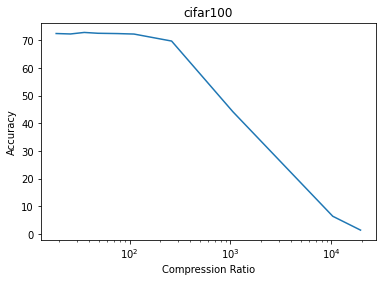

In [52]:
name = 'cifar100'
print(name)

acc_list, cr_list = [], []
for k in "1e-1,8e-2,6e-2,4e-2,2e-2,1e-2,1e-3,1e-4,1e-5,1e-6".split(','):
    _acc, _cr = investigate(f'./checkpoint_{name}/thr_{k}/last.ckpt', 1e-6)
    acc_list.append(_acc)
    cr_list.append(_cr)
print(cr_list)
print(acc_list)
    
plt.plot(cr_list, acc_list)
plt.title(name)
plt.xscale('log')
plt.xlabel('Compression Ratio')
plt.ylabel('Accuracy')

[74.         73.9609149  73.90879423 73.83929051 73.74660661 73.62301249
 73.45820147 73.23843288 72.94539145 72.55467303 72.03378054 71.33948847
 70.41441513 69.18265675 67.54444744 65.37016351 62.49492402 58.71724778
 53.80995347 47.56016333 39.86636457 30.91835256 21.42219832 12.65651858
  6.01983084]
[399720.71875, 252697.015625, 205463.921875, 173107.40625, 159308.984375, 155919.421875, 147547.921875, 148544.875, 147547.921875, 141836.390625, 140029.5625]
[19.05, 29.95, 30.43, 30.66, 30.88, 30.34, 30.53, 30.76, 30.72, 30.85, 30.08]
[149555.375, 36519.3359375, 11909.3388671875, 6789.57373046875, 4852.05029296875, 4336.220703125, 3889.02197265625, 3661.66552734375, 3539.6298828125, 3374.465087890625, 2826.87939453125]
[10.0, 38.79, 75.01, 80.7, 81.44, 81.35, 81.19, 81.13, 80.96, 81.11, 81.31]
[91222.578125, 32911.140625, 4850.97998046875, 2143.379150390625, 1344.626220703125, 1115.5751953125, 897.5886840820312, 803.3853149414062, 718.2880249023438, 647.5974731445312, 442.75668334960

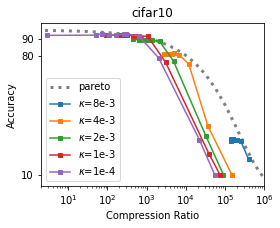

In [172]:
name = 'cifar10'

plt.figure(figsize=(4,3))
Y = sigmoid(-(10 ** ((x_ratios - 5.)/2 )))
print(74 * Y/Y[0])
plt.plot(10 ** x_ratios, 95 * Y/Y[0] , linestyle=':', c='grey', linewidth=3, label="pareto")

for pretrain_wd in "8e-3,4e-3,2e-3,1e-3,1e-4".split(','):

    acc_list, cr_list = [], []
    
    for k in "1e-1,8e-2,6e-2,4e-2,2e-2,1e-2,1e-3,1e-4,1e-5,1e-6".split(','):
        if not os.path.exists(f'finetune/{name}_pretrain_wd_{pretrain_wd}/thr_{k}'):
            continue
        try:
            _acc, _cr = investigate(f'finetune/{name}_pretrain_wd_{pretrain_wd}/thr_{k}/last.pt', 1e-6)
        except:
            _acc, _cr = investigate(f'finetune/{name}_pretrain_wd_{pretrain_wd}/thr_{k}/last.ckpt', 1e-6)
        acc_list.append(_acc)
        cr_list.append(_cr)
    try:
        init_acc, init_cr = investigate(f'pretrain/{name}_pretrain_wd_{pretrain_wd}/best.pt', 1e-6)
    except:
        init_acc, init_cr = investigate(f'pretrain/{name}_pretrain_wd_{pretrain_wd}/best.ckpt', 1e-6)
    acc_list.append(init_acc)
    cr_list.append(init_cr)
    print(cr_list)
    print(acc_list)
    plt.plot(cr_list, acc_list, label=r"$\kappa$=" + str(pretrain_wd), marker='s', markersize=4)


plt.yticks([10, 80, 90])
plt.title(f"{name}")
plt.xlim(2, 1e6)
plt.xscale('log')
plt.legend()
plt.xlabel('Compression Ratio')
plt.ylabel('Accuracy')
#plt.yscale('log')
plt.savefig('cifar10.png', dpi=250, bbox_inches='tight')

[7.40000000e+01 7.39753798e+01 7.39370444e+01 7.38773537e+01
 7.37844117e+01 7.36396964e+01 7.34143713e+01 7.30635494e+01
 7.25173893e+01 7.16673334e+01 7.03450684e+01 6.82912207e+01
 6.51120391e+01 6.02318028e+01 5.28882035e+01 4.23425107e+01
 2.87088440e+01 1.45213660e+01 4.53400948e+00 6.79344414e-01
 3.40747995e-02 3.20571027e-04 2.24056660e-07 2.73478782e-12
 6.11463381e-20]
[206325.234375, 46089.35546875, 37229.00390625, 31810.94921875, 28159.18359375, 25881.359375, 25288.431640625, 24529.779296875, 23892.640625, 23361.693359375, 22596.51953125, 21268.59375]
[1.0, 6.69, 9.88, 10.47, 10.66, 10.77, 10.89, 11.03, 10.84, 11.1, 11.13, 10.75]
[117429.78125, 18185.171875, 10448.0830078125, 6417.67431640625, 4414.47705078125, 3534.55029296875, 3255.684814453125, 2929.900634765625, 2750.660400390625, 2609.859375, 2498.506103515625, 2094.374267578125]
[1.0, 10.52, 23.49, 32.86, 35.21, 35.15, 35.59, 35.66, 35.19, 35.79, 35.74, 35.26]
[24101.310546875, 13585.72265625, 1524.3250732421875, 467

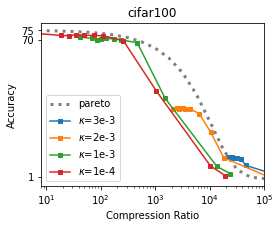

In [11]:
name = 'cifar100'

plt.figure(figsize=(4,3))
Y = sigmoid(-(10 ** ((x_ratios - 3.8)/1.3 )))
print(74 * Y/Y[0])
plt.plot(10 ** x_ratios, 75 * Y/Y[0] , linestyle=':', c='grey', linewidth=3, label="pareto")
for pretrain_wd in "3e-3,2e-3,1e-3,1e-4".split(','):

    acc_list, cr_list = [], []
    
    for k in "5e-1,1e-1,8e-2,6e-2,4e-2,2e-2,1e-2,1e-3,1e-4,1e-5,1e-6".split(','):
        if not os.path.exists(f'finetune/{name}_pretrain_wd_{pretrain_wd}/thr_{k}'):
            continue
        try:
            _acc, _cr = investigate(f'finetune/{name}_pretrain_wd_{pretrain_wd}/thr_{k}/last.pt', 1e-6)
        except:
            _acc, _cr = investigate(f'finetune/{name}_pretrain_wd_{pretrain_wd}/thr_{k}/last.ckpt', 1e-6)
        acc_list.append(_acc)
        cr_list.append(_cr)
    try:
        init_acc, init_cr = investigate(f'pretrain/{name}_pretrain_wd_{pretrain_wd}/best.pt', 1e-6)
    except:
        init_acc, init_cr = investigate(f'pretrain/{name}_pretrain_wd_{pretrain_wd}/best.ckpt', 1e-6)
    acc_list.append(init_acc)
    cr_list.append(init_cr)
    print(cr_list)
    print(acc_list)
    plt.plot(cr_list, acc_list, label=r"$\kappa$=" + str(pretrain_wd), marker='s', markersize=4)

plt.yticks([1, 70, 75])
plt.title(f"{name}")
plt.xscale('log')
plt.legend()
plt.xlim(8, 1e5)

plt.xlabel('Compression Ratio')
plt.ylabel('Accuracy')
#plt.yscale('log')
plt.savefig('cifar100.png', dpi=250, bbox_inches='tight')

In [6]:
hide = [72.9,        73.16,       73.50333333, 72.83666667, 72.08,       70.57,
 68.97333333, 66.84,       63.51,       59.82,       54.93666667, 49.57,
 41.38333333, 33.15666667, 24.13333333, 15.76666667,  9.76666667,  6.45,
  4.80666667,  2.93,        2.67666667,  1.91333333,  1.41,        1.16,
  1.        ]
def sigmoid(z):
    return 1/(1 + np.exp(-z))


[46089.35546875, 37229.00390625, 31810.94921875, 28159.18359375, 25881.359375, 25288.431640625, 24529.779296875, 23892.640625, 23361.693359375, 22596.51953125, 21268.59375]
[6.69, 9.88, 10.47, 10.66, 10.77, 10.89, 11.03, 10.84, 11.1, 11.13, 10.75]
[18185.171875, 10448.0830078125, 6417.67431640625, 4414.47705078125, 3534.55029296875, 3255.684814453125, 2929.900634765625, 2750.660400390625, 2609.859375, 2498.506103515625, 2094.374267578125]
[10.52, 23.49, 32.86, 35.21, 35.15, 35.59, 35.66, 35.19, 35.79, 35.74, 35.26]
[24101.310546875, 13585.72265625, 1524.3250732421875, 467.8279113769531, 234.20925903320312, 175.90794372558594, 125.1512222290039, 102.33247375488281, 84.24908447265625, 69.29989624023438, 40.88417434692383]
[2.44, 6.12, 40.59, 68.75, 70.19, 70.64, 70.94, 70.73, 70.34, 70.87, 71.64]
[19416.7109375, 10311.443359375, 1056.4073486328125, 261.1680908203125, 110.6828384399414, 76.1274185180664, 48.76350784301758, 35.6347541809082, 26.038320541381836, 18.777578353881836, 7.163877

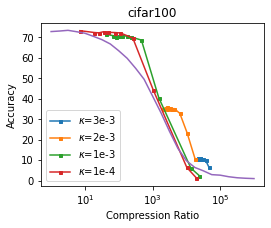

In [10]:
name = 'cifar100'
plt.figure(figsize=(4,3))

for pretrain_wd in "3e-3,2e-3,1e-3,1e-4".split(','):

    acc_list, cr_list = [], []
    
    for k in "1e-1,8e-2,6e-2,4e-2,2e-2,1e-2,1e-3,1e-4,1e-5,1e-6".split(','):
        try:
            _acc, _cr = investigate(f'finetune/{name}_pretrain_wd_{pretrain_wd}/thr_{k}/last.pt', 1e-6)
        except:
            _acc, _cr = investigate(f'finetune/{name}_pretrain_wd_{pretrain_wd}/thr_{k}/last.ckpt', 1e-6)
        acc_list.append(_acc)
        cr_list.append(_cr)
        
    init_acc, init_cr = investigate(f'pretrain/{name}_pretrain_wd_{pretrain_wd}/best.pt', 1e-6)
    acc_list.append(init_acc)
    cr_list.append(init_cr)
    print(cr_list)
    print(acc_list)
    plt.plot(cr_list, acc_list, label=r"$\kappa$=" + str(pretrain_wd), marker='s', markersize=3)

x_ratios = np.linspace(0,6,len(hide))
plt.plot(10 ** x_ratios, hide)

#Y = sigmoid(-(10 ** ((x_ratios - 3.8)/1.3 )))
#print(74 * Y/Y[0])
#plt.plot(10 ** x_ratios, 75 * Y/Y[0] , linestyle='--', c='black')

plt.title(f"{name}")
plt.xscale('log')
plt.legend(loc='lower left')
plt.xlabel('Compression Ratio')
plt.ylabel('Accuracy')
plt.savefig('cifar100.png', dpi=250, bbox_inches='tight')

In [150]:
print(list(zip(10 ** x_ratios, hide)))

[(1.0, 72.9), (1.7782794100389228, 73.16), (3.1622776601683795, 73.50333333), (5.623413251903491, 72.83666667), (10.0, 72.08), (17.78279410038923, 70.57), (31.622776601683793, 68.97333333), (56.23413251903491, 66.84), (100.0, 63.51), (177.82794100389228, 59.82), (316.22776601683796, 54.93666667), (562.341325190349, 49.57), (1000.0, 41.38333333), (1778.2794100389228, 33.15666667), (3162.2776601683795, 24.13333333), (5623.413251903491, 15.76666667), (10000.0, 9.76666667), (17782.794100389227, 6.45), (31622.776601683792, 4.80666667), (56234.13251903491, 2.93), (100000.0, 2.67666667), (177827.94100389228, 1.91333333), (316227.7660168379, 1.41), (562341.3251903491, 1.16), (1000000.0, 1.0)]


[74.         73.99808027 73.99466657 73.98859646 73.97780333 73.95861402
 73.92450236 73.86388115 73.75620249 73.56510736 73.22650906 72.62823192
 71.57637728 69.74337584 66.59897395 61.35344471 53.02508446 40.908531
 25.79049139 11.3546499   2.63996351  0.19720734  0.          0.
  0.        ]


/tmp/ipykernel_45090/286227605.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


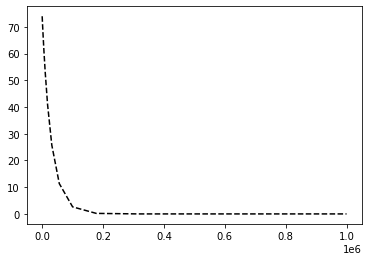

In [111]:
Y = sigmoid(-((10 ** x_ratios) /30000 + 700))
print(74 * Y/Y[0])
plt.plot(10 ** x_ratios, 74 * Y/Y[0], linestyle='--', c='black')

for key in checkpoint['net'].keys():
    if 'conv' in key and 'weight2' not in key:
        
        weight1 = checkpoint['net'][key]
        key = key + '2'
        weight2 = checkpoint['net'][key]
        weight = weight1 #* weight2
        weight = weight.cpu().view(-1).abs().numpy()
        plt.title(key)

        plt.hist(weight, bins=200)
        plt.yscale('log')
        plt.show()
        plt.close()

In [ ]:
#for parameter in net.parameters():
##    weight = parameter.data.cpu().view(-1).abs().numpy()
#    plt.hist(weight, bins=100)
##    plt.yscale('log')
#    plt.show()
#    plt.close()

In [ ]:
device = 'cuda'
net = ResNet18()
net = net.to(device)
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True
    
checkpoint = torch.load('./checkpoint/last_ckpt.pth')
net.load_state_dict(checkpoint['net'])
best_acc = checkpoint['acc']
start_epoch = checkpoint['epoch']

In [3]:
#for parameter in net.parameters():
#    weight = parameter.data.cpu().view(-1).abs().numpy()
#    plt.hist(weight, bins=100)
#    plt.yscale('log')
#    plt.show()
#    plt.close()

In [4]:
for key in checkpoint['net'].keys():
    if 'conv' in key and 'weight2' not in key:
        
        weight1 = checkpoint['net'][key]
        key = key + '2'
        weight2 = checkpoint['net'][key]
        weight = weight1 * weight2
        weight = weight.cpu().view(-1).abs().numpy()
        plt.title(key)
        plt.hist(weight, bins=200)
        plt.yscale('log')
        plt.show()
        plt.close()

NameError: name 'checkpoint' is not defined

In [75]:
device = 'cuda'
net = ResNet18()
net = net.to(device)
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True
    
checkpoint = torch.load('./checkpoint/best_real_dense.pth')
#net.load_state_dict(checkpoint['net'])
best_acc = checkpoint['acc']
start_epoch = checkpoint['epoch']




In [132]:
new_check = {} #copy.deepcopy(checkpoint['net'])
target_keys = list(net.module.state_dict().keys())
for key in checkpoint['net'].keys():
    
    key2 = key[7:] 
    #print(key2)
    if key2 in target_keys:
        weight1 = checkpoint['net'][key]
        new_check['module.' + key2] = weight1
        
        
        key3 =  key2+ '2'

        if key3 in target_keys:
            #print('   ')
        #weight2 = checkpoint['net'][key]
            key3 = 'module.' + key3
            weight = weight1 #* weight2
            new_check[key3] = torch.ones_like(weight)
            #weight = weight.cpu().view(-1).abs().numpy()
        
        
        

In [133]:
net.load_state_dict(new_check)

<All keys matched successfully>

['conv1.weight',
 'conv1.weight2',
 'bn1.weight',
 'bn1.bias',
 'bn1.running_mean',
 'bn1.running_var',
 'bn1.num_batches_tracked',
 'layer1.0.conv1.weight',
 'layer1.0.conv1.weight2',
 'layer1.0.bn1.weight',
 'layer1.0.bn1.bias',
 'layer1.0.bn1.running_mean',
 'layer1.0.bn1.running_var',
 'layer1.0.bn1.num_batches_tracked',
 'layer1.0.conv2.weight',
 'layer1.0.conv2.weight2',
 'layer1.0.bn2.weight',
 'layer1.0.bn2.bias',
 'layer1.0.bn2.running_mean',
 'layer1.0.bn2.running_var',
 'layer1.0.bn2.num_batches_tracked',
 'layer1.1.conv1.weight',
 'layer1.1.conv1.weight2',
 'layer1.1.bn1.weight',
 'layer1.1.bn1.bias',
 'layer1.1.bn1.running_mean',
 'layer1.1.bn1.running_var',
 'layer1.1.bn1.num_batches_tracked',
 'layer1.1.conv2.weight',
 'layer1.1.conv2.weight2',
 'layer1.1.bn2.weight',
 'layer1.1.bn2.bias',
 'layer1.1.bn2.running_mean',
 'layer1.1.bn2.running_var',
 'layer1.1.bn2.num_batches_tracked',
 'layer2.0.conv1.weight',
 'layer2.0.conv1.weight2',
 'layer2.0.bn1.weight',
 'layer2.0.

In [99]:
new_check = copy.deepcopy(checkpoint['net'])
for key in checkpoint['net'].keys():
    if 'conv' in key:
        
        weight1 = checkpoint['net'][key]
        key2 = key + '2'
        
        #weight2 = checkpoint['net'][key]
        weight = weight1 #* weight2
        new_check[key2] = torch.ones_like(weight)
        weight = weight.cpu().view(-1).abs().numpy()
        
        
    if "shortcut" in key and "weight" in key:
        weight1 = checkpoint['net'][key]
        key2 = key + '2'
        #weight2 = checkpoint['net'][key]
        weight = weight1 #* weight2
        new_check[key2] = torch.ones_like(weight)
        
    if "linear" in key and "weight" in key:
        weight1 = checkpoint['net'][key]
        key2 = key + '2'
        #weight2 = checkpoint['net'][key]
        weight = weight1 #* weight2
        new_check[key2] = torch.ones_like(weight)

In [100]:
net.load_state_dict(new_check)

RuntimeError: Error(s) in loading state_dict for DataParallel:
	Unexpected key(s) in state_dict: "module.layer2.0.shortcut.1.weight2", "module.layer3.0.shortcut.1.weight2", "module.layer4.0.shortcut.1.weight2", "module.linear.bias". 